In [10]:
import numpy as np
import matplotlib.pyplot as plt

# limpy pakcgae is imported just to plot the maps easily. It is not mandatory for reading the maps. 
import limpy.lines as ll 


### A few words about the simulations and parameters

$\underline{\textbf{Simulations}}$: Halo catalogs are generated using the Gadget simulation suite for a box with a size of 100 Mpc/h, covering 100 redshifts ranging from 0 to 20. The minimum mass of the halos is $2 \times 10^{10}, M_\odot/h$. Subsequently, these halo catalogs are painted with line luminosities using the LIMpy package.

$\underline{\textbf{Projected maps}}$: We create maps at a central frequency, $\nu_{\rm cen}$, along with a broad frequency bandwidth, $\Delta \nu$. For instance, if $\nu_{\rm cen}= 90$ GHz and $\Delta \nu=30$ GHz, the maps span frequencies from 75 GHz to 105 GHz. Given the relatively compact size of the simulation box, we first determine the number of simulation boxes required to span such a wide frequency range along the redshift ("z") direction. Below, we list key parameters associated with this approach.

$\textbf{z_start}$: The redshift corresponding to the back side of the 3D box.  
$\textbf{z_end}$: The redshift corresponding to the front side of the 3D box.  
$\textbf{boxsize_x}$: Box size along the x-direction (Mpc/h).  
$\textbf{boxsize_y}$: Box size along the y-direction (Mpc/h).  
$\textbf{boxsize_z}$: Box size along the z-direction (Mpc/h).  
$\textbf{sfr_model}$: The star formation model used in generating the map (according to LIMpy's model names).  
$\textbf{line_model}$: The model used for converting sfr (or halo mass) into line luminosity (according to LIMpy's model names).  
$\textbf{ngrid}$: The number of grids in the x and y directions for the 2D map.  
$\textbf{dnu_obs}$: The frequency resolution ($\delta \nu_{\rm obs}$) applied when projecting intensities from one 3D box. This parameter is not significant for 2D maps.    

$\underline{\textbf{Reading the maps}}$: The maps are stored as npz files, following the naming convention "IM_2D_**XX**GHZ_**YY**_**ZZ**arcmin.npz," where **XX** represents the frequency in GHz, **YY** denotes the line name, and **ZZ** signifies the FWHM beam size in arcminutes.

Within the "maps" folder, you will find CO(2-1) maps for 90 GHz and 150 GHz frequency channels. For each frequency channel, there are maps available with three different beam sizes: 1, 1.5, and 2 arcminutes.

### Read and plot the maps

In [34]:
# read the map from the disk
maps_loc = "./maps/"  #location of the maps 

#define parameters
nu_cen = 150 
delta_nu = 30
line_name = "CO21" # CO(2-1) line
theta_fwhm = 1.5 # in arc-min

# read the npz file
f_150 = np.load(maps_loc + "IM_2D_{:d}GHZ_{:s}_{:.2f}arcmin.npz".format(nu_cen, line_name, theta_fwhm))

#extract the map
im_150 = f_150['grid']

print("The shape of the map is", np.shape(im_150))

The shape of the map is (512, 512)


In [35]:
# get info about other parameters
f_150.files

['grid',
 'z_start',
 'z_end',
 'sfr_model',
 'line_model',
 'boxsize',
 'ngrid',
 'dnu_obs']

### plot the maps

In [36]:
# get the central redshift of the map
z_cen =  (f_150['z_start'] + f_150['z_end'])/2

# parameters of sims
ngrid = 512
boxsize = 100

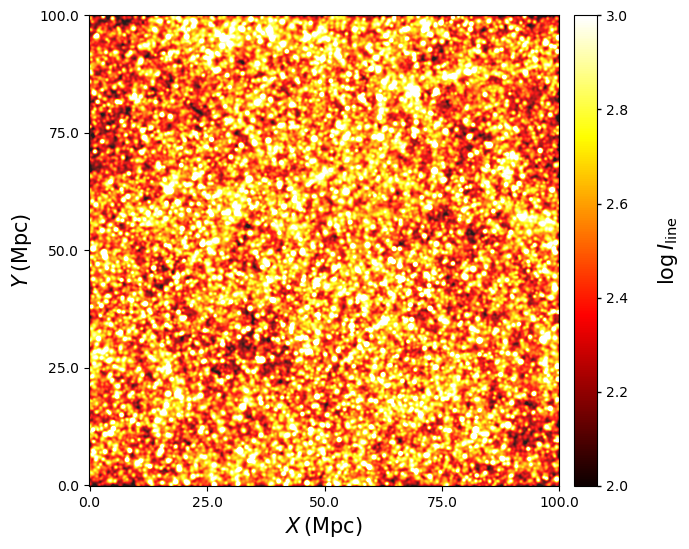

In [37]:
# use limpy for ploting (alternatively you can use plt.imshow)
# plot_unit can be set as 'degree' or 'mpc'

ll.plot_beam_convolution(im_150, ngrid, 
                         boxsize, z_cen, cmap="hot", plot_scale="log", vmax=1e3, vmin=1e2, plot_unit="mpc")

### Calculate and plot power spectrum

In [38]:
import limpy.powerspectra as lp
import limpy.utils as lu

k, pk = lp.get_pk2d(im_150, boxsize, boxsize, ngrid, ngrid) 

Text(0, 0.5, '$\\Delta^2(k)$')

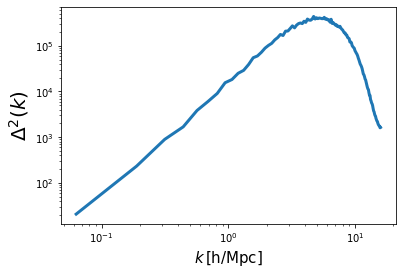

In [39]:
plt.loglog(k, k**3* pk/(2*np.pi**2), lw =3)
plt.xlabel(r"$k\,[\mathrm{h/Mpc}]$", fontsize = 15)
plt.ylabel(r"$\Delta^2(k)$", fontsize = 20)

# Read maps for the total CO emission and different co models 

The maps are stored as npz files, following the naming convention "IM_2D_150GHZ_CO21_*Model_name*_no_beam.npz",
where Model_name is one of 'Visbal10', 'Kamenetzky15', 'Alma_scalling'. 

In [58]:
# Read the CO(2-1) maps for different models

#define parameters
nu_cen = 150 
delta_nu = 30
line_name = "CO21" # CO(2-1) line
model_name = "Kamenetzky15"

maps_loc = "./maps_OCT2/"

# read the npz file
f_150 = np.load(maps_loc + "IM_2D_{:d}GHZ_{:s}_{:s}_no_beam.npz".format(nu_cen, line_name, model_name))

im_150 = f_150['grid']

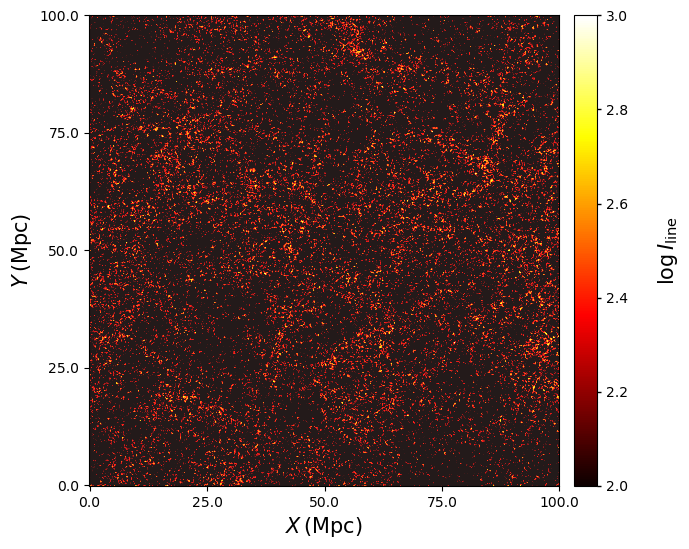

In [59]:
ll.plot_beam_convolution(im_150, ngrid, 
                         boxsize, z_cen, cmap="hot", plot_scale="log", vmax=1e3, vmin=1e2, plot_unit="mpc")

### Read the maps containing total CO emission. 

For total CO emission, map names are saved as "IM_2D_TOTAL_150GHZ_*model_name*_no_beam.npz". 

In [73]:
model_name = "Alma_scalling"

# read the npz file
f_150 = np.load(maps_loc + "IM_2D_TOTAL_{:d}GHZ_{:s}_no_beam.npz".format(nu_cen, model_name))

im_150 = f_150['grid']

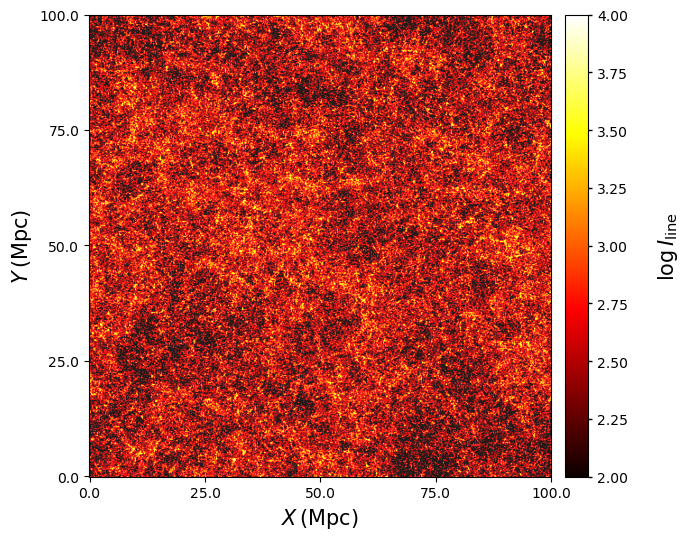

In [74]:
ll.plot_beam_convolution(im_150, ngrid, 
                         boxsize, z_cen, cmap="hot", plot_scale="log", vmax=1e4, vmin=1e2, plot_unit="mpc")